SPLITTING DATASET TO TRAIN,VAL,TEST

In [ ]:
#!pip install split-folders

In [ ]:
import splitfolders 

splitfolders.ratio("F:\.FINAL YEAR PROJECT\without_augmentation",
                   output="F:\.FINAL YEAR PROJECT\Split_withOut_augmentation", 
                   seed=13,
                  ratio=(.8, .1, .1),
                   group_prefix=None) 
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.


INSTALLING REQUIRED PACKAGES

In [17]:
#!pip install numpy
#!pip install pandas
#!pip  install tensorflow
#import matplotlib
#matplotlib.__version__
#!pip install tensorflow_hub

In [18]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from keras import models
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
BATCH_SIZE = 30 
IMAGE_HEIGHT = 224
IMAGE_WIDTH=224
IMAGE_SIZE=224
CHANNELS=3
EPOCHS=5  

IMPORTING DARASET

In [20]:
# importing training Dataset

TrainDataset = tf.keras.preprocessing.image_dataset_from_directory(
    "F:\\.FINAL YEAR PROJECT\\Split_withOut_augmentation\\train",
    shuffle=True,
    image_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
    batch_size=BATCH_SIZE
    
)

Found 18780 files belonging to 17 classes.


In [12]:
#importing validation data set
ValidationDataset= tf.keras.preprocessing.image_dataset_from_directory(
    "F:\\.FINAL YEAR PROJECT\\Split_withOut_augmentation\\val",
    shuffle=False,
    image_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
    batch_size=BATCH_SIZE
)

Found 2346 files belonging to 17 classes.


In [13]:
#classnames in data set
classes= TrainDataset.class_names

for i in range(len(classes)):
  print(i,"-",classes[i])



0 - Apple___Apple_scab
1 - Apple___Black_rot
2 - Apple___Cedar_apple_rust
3 - Apple___healthy
4 - Potato___Early_blight
5 - Potato___Late_blight
6 - Potato___healthy
7 - Tomato___Bacterial_spot
8 - Tomato___Early_blight
9 - Tomato___Late_blight
10 - Tomato___Leaf_Mold
11 - Tomato___Septoria_leaf_spot
12 - Tomato___Spider_mites Two-spotted_spider_mite
13 - Tomato___Target_Spot
14 - Tomato___Tomato_Yellow_Leaf_Curl_Virus
15 - Tomato___Tomato_mosaic_virus
16 - Tomato___healthy


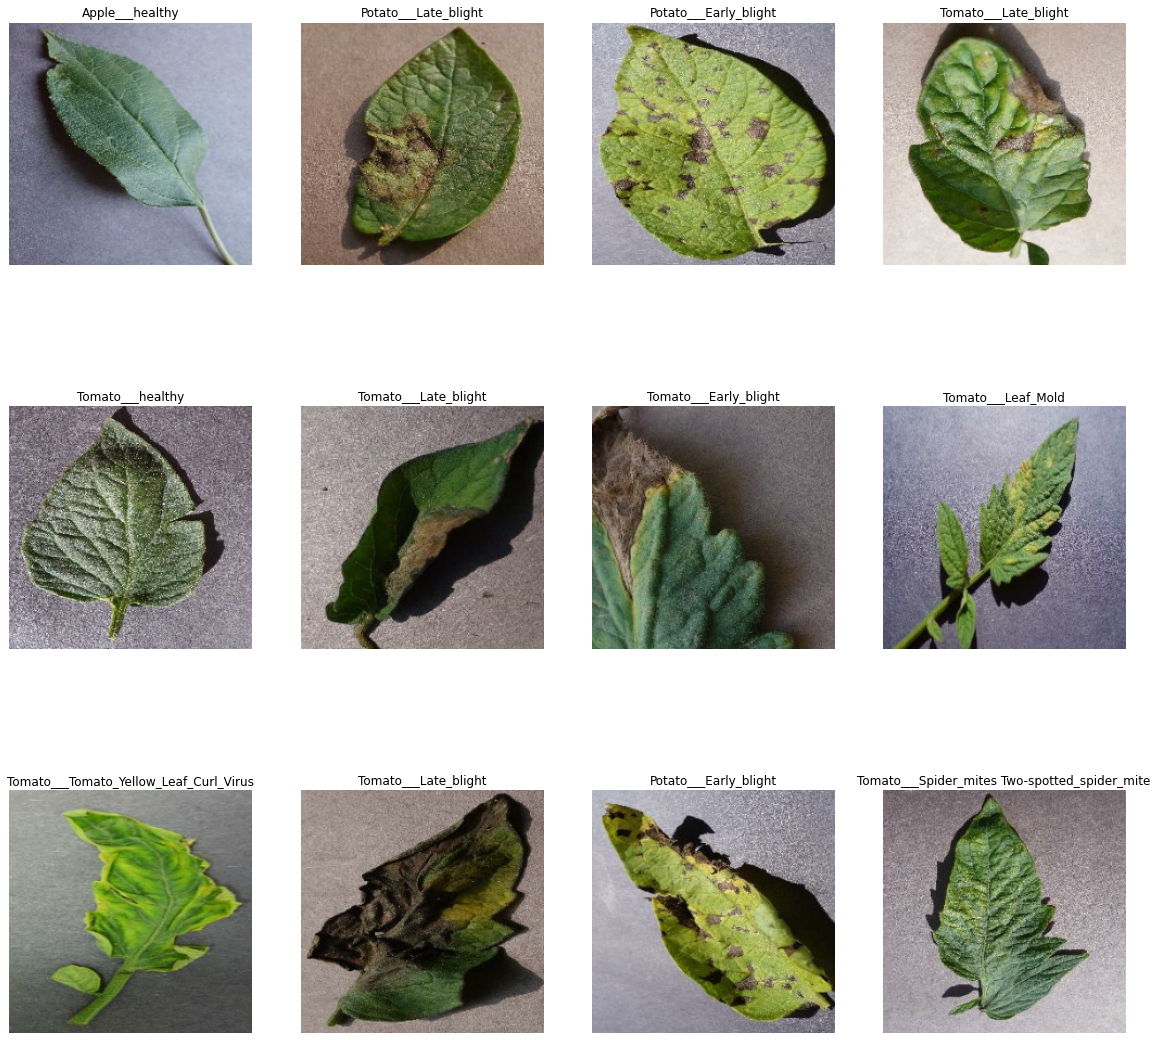

In [14]:
plt.figure(figsize=(20, 20))
for image_batch, labels_batch in TrainDataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classes[labels_batch[i]])
        plt.axis("off")

DATA AUGMENTATION

In [15]:
from tensorflow.keras import layers

In [25]:
Resize_Rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_HEIGHT,IMAGE_WIDTH),
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.experimental.preprocessing.RandomRotation(0.3),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

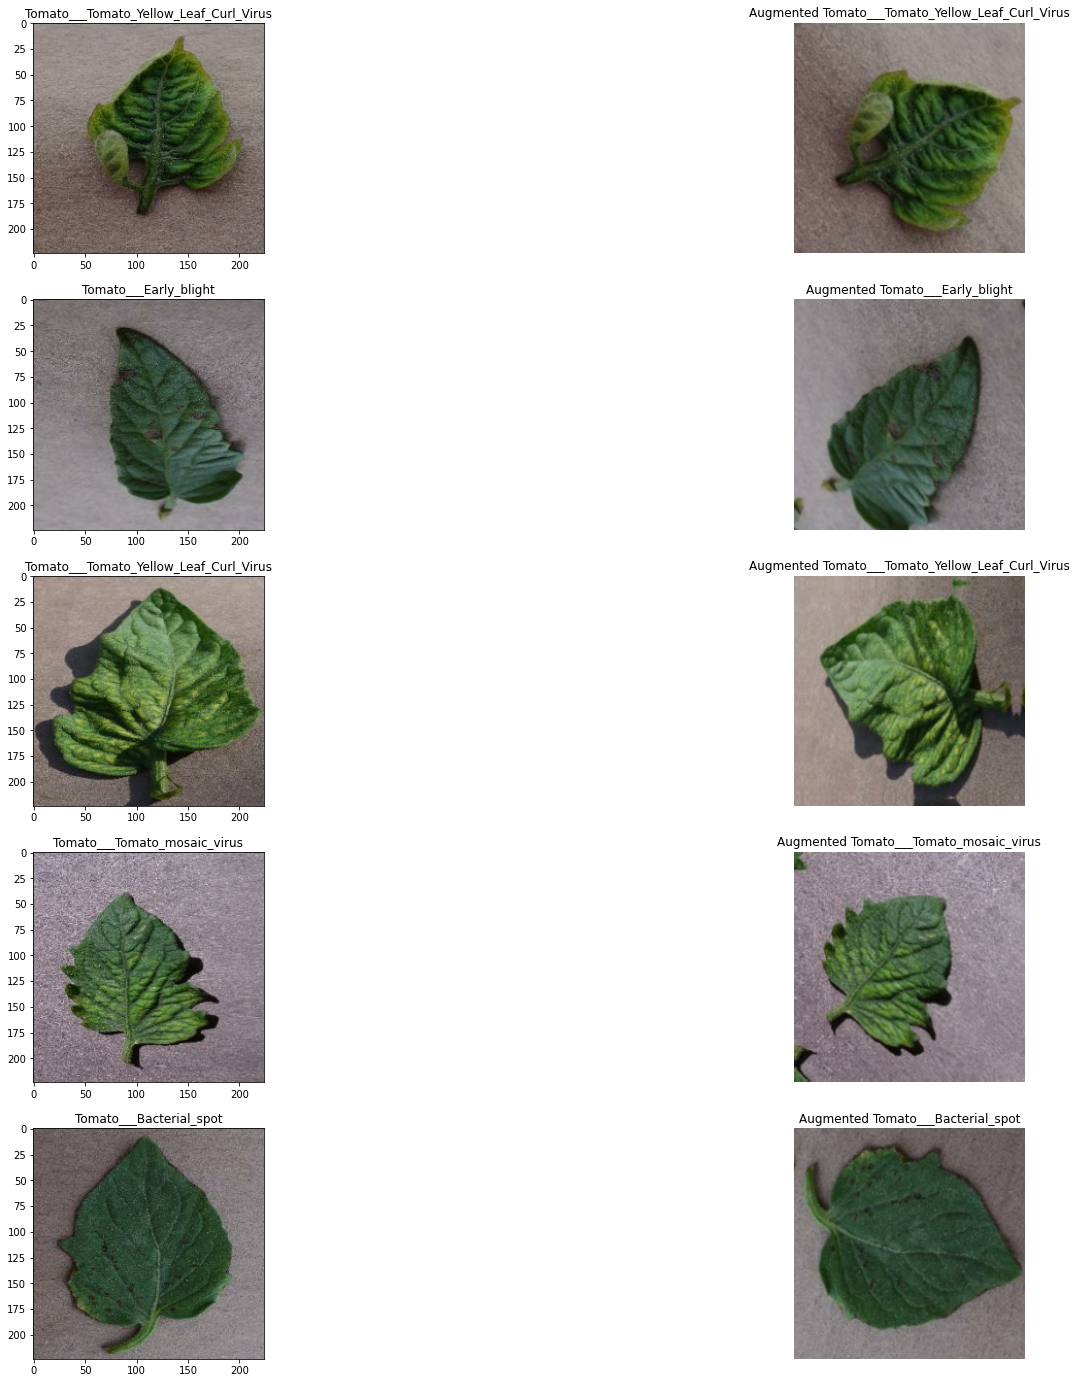

In [28]:
plt.figure(figsize=(25, 50))
for image_batch, labels_batch in TrainDataset.take(1):
    for i in range(0,10,2):
        augmented_images = Resize_Rescale(image_batch[i])
        ax = plt.subplot(10,2,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classes[labels_batch[i]])
        ax = plt.subplot(10,2,i+2)
        plt.imshow(augmented_images)
        plt.title("Augmented "+str(classes[labels_batch[i]]))
        plt.axis("off")